# Computation of transverse-Ising jump operators

In [1]:
include("notebook_preamble.jl");

In [2]:
include("TransverseIsingModels.jl")
using .TransverseIsingModels
TIM = TransverseIsingModels;

In [3]:
# These can likely be made more efficient.
opip(A, B) = tr(dagger(A) * B)
opip(A) = tr(dagger(A) * A)
opnorm(A) = √opip(A)
opnormalize(A) = A / opnorm(A)
opcos(A, B) = real(abs(opip(A, B)) / (opnorm(A) * opnorm(B)))

project(P, J) = J == zero(J) ? zero(eltype(J)) : opip(P / opip(P), J)
jumpcos(P, J) = J == zero(J) ? real(one(eltype(J))) : opcos(P, J);

In [4]:
tim = TransverseIsingModel(5, 0.5)
ebs = basiseigen(tim);

In [5]:
As = (changebasis(op(tim, i); basiseigensys=ebs)
        for i in 1:tim.N, op in [sx, sy, sz])
Ps = (changebasis(op(tim, i); basiseigensys=ebs)
        for i in 1:tim.N, op in [sx, sy, sz]);

In [6]:
using Statistics

TODO: Fix slowness (precompilation and type-instability).

In [7]:
Jωs = jumpoperators(tim; basiseigensys=ebs) do jumpop
    Js = (jumpop(A) for A in As)
    OKJs = Iterators.filter(J -> J != zero(J), Js)
    cosines = (jumpcos(P, J) for J in OKJs, P in Ps)
    μ = isempty(cosines) ? missing : mean(cosines)
end;

In [8]:
using KernelDensity

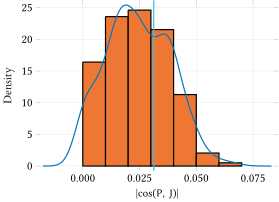

In [9]:
cosines = values(Jωs) |> skipmissing |> collect
histogram(cosines, normalize=true,
    xlabel=L"\abs{\cos(\opr{P},\, \opr{J})}", ylabel="Density", legend=false);
cosine_kde = kde(cosines)
plot!(cosine_kde.x, cosine_kde.density)
vline!([1 / 2^tim.N])